### Calculs sur un Modèle Numérique de Terrain (MNT) 

# Partie 1 : Présentation


## 1. Les données

- Un **MNT** est un fichier contenant des données de hauteur pour une parcelle décrite dans les méta données : 

1. Les deux premières valeurs indiquent la taille de la parcelle en nombre de lignes et de colonnes. 
2. Les deux lignes suivantes indiquent les coordonnées du coin supérieur gauche 
3. La cinquième ligne la taille du point. 
4. La dernière ligne de l’entête donne la valeur appelée **NO_DATA** associée à l’absence d’information sur un point du MNT. 
5. Les lignes suivantes contiennent les valeurs des hauteurs. 

## 2. Les directions dans un MNT 

Il s'agit pour chaque point du MNT de coder la direction du flux. Autrement dit on recherche parmi les 8 voisins le point le plus bas. Le résultat est une direction Nord, Nord Est, Est, etc codée respectivement par un entier de 1 à 8 comme illustré ci-dessous. Si le point correspond à une cuvette c’est-à-dire s’il est plus bas que ses voisins alors on codera la direction par un 0.

$$\begin{array}{|l|c|}
\hline
Direction & Code\\
\hline
\hline
Nord &1\\
\hline
Nord-Est &2\\
\hline
Est &3 \\
\hline
Sud-Est &4 \\
\hline
Sud &5 \\
\hline
Sud-Ouest &6\\
\hline
Ouest &7\\
\hline
Nord-Ouest &8\\
\hline
Cuvette &0\\
\hline
\end{array}$$


et par rapport à une cellule 
$$\begin{array}{|c|c|c|} 
\hline
8 &1 &2\\
\hline
7 &0 &3\\
\hline
6 &5 &4\\
\hline
\end{array}$$

En considérant un MNT de taille $n \times m$ et si on note une cellule du MNT par ses indices $(i,j)$ alors $H(i,j)$ désigne la hauteur du point $(i,j)$ et le calcul des directions est une matrice $D$ telle que $D(i,j)$ est la direction du point $(i,j)$ dans le MNT.

## 3. Les flots d'accumulation

La détermination des flots d’accumulation consiste à calculer pour chaque cellule d’un MNT le nombre de cellules qu’elle draine (autrement dit qui se déversent dans cette cellule). Ce calcul nécessite de connaître le résultat du calcul des directions. On peut alors appliquer l'algorithme suivant avec $F$ la matrice des flots d'accumulation telle que $F(i,j)$ est la somme des points qui se déversent dans $(i,j)$.

1. Initialisation de $F$ : 
    * $F(i,j)=1$ pour tous les points qui n'ont pas de voisins plus hauts qu'eux sinon $F(i,j)=0$. On dit alors qu'un point est marqué si $F(i,j) \neq 0$
   
   
2. Tant qu'il existe un point $(i,j)$ non marqué
    * Pour chaque point $(i,j)$ non marqué, si tous les voisins qui se déversent sur lui sont marqués, alors  $F(i,j)$ est la somme des flots de ces voisins plus lui même.
    
## 4. Un exemple $6 \times 6$

- Le MNT sans no_data

\begin{array}{|c|c|c|c|c|c|}
\hline
78&72&69&71&58&49\\
\hline
74&67&56&49&46&50\\
\hline
69&53&44&37&38&38\\
\hline
64&58&55&22&31&24\\
\hline
68&51&47&21&16&19\\
\hline
74&53&54&12&11&12\\
\hline
\end{array}

- La matrice des directions avec une représentation par des flèches (à gauche), avec les directions codées (à droite) et avec le code de couleurs (cf kernel EasyPAP)

\begin{array}{|c|c|c|c|c|c||c|c|c|c|c|c|}
\hline
\searrow &\searrow &\searrow&\searrow&\downarrow&\swarrow&&4&4&4&4&5&6\\
\hline
\searrow &\searrow &\searrow&\downarrow&\swarrow&\downarrow&&4&4&4&5&6&5\\
\hline
\rightarrow &\rightarrow &\searrow&\downarrow&\swarrow&\downarrow&&3&3&4&5&6&5\\
\hline
\searrow &\nearrow &\searrow&\searrow&\downarrow&\swarrow&&4&2&4&4&5&6\\
\hline
\rightarrow &\rightarrow &\searrow&\searrow&\downarrow&\swarrow&&3&3&4&4&5&6\\
\hline
\nearrow &\nearrow &\rightarrow&\rightarrow&&\leftarrow&&2&2&3&3&0&7\\
\hline
\end{array}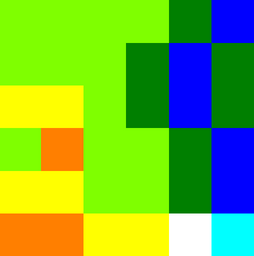
- Les flots d'accumulation

\begin{array}{|c|c|c|c|c|c|}
\hline
1&1&1&1&1&1\\
\hline
1&2&2&2&4&1\\
\hline
1&3&7&9&1&2\\
\hline
1&1&1&18&1&3\\
\hline
1&4&6&2&23&1\\
\hline
1&1&1&8&36&1\\
\hline
\end{array}

# Partie 2 La parallélisation

## 1. Le calcul des directions

1. Quelles sont les dépendances pour les calculs ?
2. Comment distribuer les données ?
3. Comment prendre en compte les **no_data** ?
4. Quelles sont les hypothèses à faire sur les différentes tailles ?
5. Comment anticiper les performances ?

## 2. Le calcul de flots d'accumulation

1. Quelles sont les dépendances pour les calculs ?
2. Doit-on redistribuer les données ?
3. Les hypothèses à faire sur les différentes tailles sont-elles différentes ?
4. Comment anticiper les performances ?




# Partie 3 A réaliser en TP

A partir du squelette disponible sur Celene qui contient déjà une version séquentielle et un ensemble de fonctions déjà implémentées pour le calcul des directions vous devez 

1. Comprendre le code séquentiel et en particulier la lecture du terrain qui anticipe les ghosts
2. Suivre les instructions données dans la fonction *mnt_compute_mpi* pour
    * définir les paramètres pour prévoir un découpage en bandes
    * réaliser la distribution des données initiales
    * réaliser le calcul des directions
    * prévoir la modification de cur_img (cette partie permet un peu de monitoring et également de vérifier les résultats par rapport à la version séquentielle).
    * rassembler les résultats pour avoir l'image compléte.
    
3. Vous pouvez tester sur 4 jeux de données

    * petit.txt (ligne 11 décommentée) correspond à l'exemple donné ici (**./run -k mnt -v seq -i 1 -s 6 -ts 6**).
    * jeu_essai.txt (ligne 12 décommentée) est une extraction 32 x 32 de la dalle suivante (**./run -k mnt -v seq -i 1 -s 32 -ts 32**).
    * grd_618360_6754408.txt (ligne 13 décommentée) est une dalle 1024 x 1024 extraite du bassin Bretagne-Centre Val de Loire (**./run -k mnt -v seq -i 1 -s 1024 -ts 1024**).
    * alpes.txt est une dalle compléte de taille 1025x1025 (**./run -k mnt -v seq -i 1 -s 1025 -ts 1025**).

4. Ajouter au variant séquentiel le calcul des flots d'accumulation

5. Ajouter au variant mpi le calcul des flots d'accumulation sans rassembler au préalable le résultat du calcul des directions.

Pour avoir une image associée au calcul des flots d'accumulation, vous disposez également d'une fonction de conversion du résultat sur l'image courante.
      


# Partie 4 Projet 8h-18h 19 décembre 2023
Pour chaque rendu vous devez déposer une **archive .tgz** sur le dépôt Celene correspondant. 

Votre archive devra contenir votre kernel et un ReadME avec votre nom ou les deux noms du binôme ainsi qu'un bilan de ce que vous avez réalisé. Pour chaque rendu vous aurez également des indications de ce que doit contenir en plus votre ReadME.

## Rendu initial (9h00)
Vous devez dans ce premier rendu, fournir le kernel avec les deux variants mnt_compute_seq et mnt_compute_mpi contenant le calcul des directions et des flots d'accumulation respectivement en séquentiel et en paralléle pour une version architecture distribuée (MPI).

Dans le ReadMe vous préciserez la manière dont vous avez implémenté la parallélisation des flots d'accumulation en particulier le critère d'arrêt.

A la suite de ce rendu, vous disposerez si vous le souhaitez d'une version du kernel ***mnt.c*** sur Celene qui implémente une version paralléle des deux calculs avec la gestion des ghosts avec une distribution simple des bandes sur tous les processus. Pour cette version on suppose que $n$ est divisible par le nombre de processus de l'exécution paralléle.


## Le calcul des bassins versants

Lors du calcul des directions, toutes les cellules dont les voisins étaient plus hauts ont été mises à 0. Ces cellules sont des puits. Le calcul des bassins versants consiste à construire une nouvelle matrice $B$ de taille $n\times m$ dont les points sont numérotés afin d'indiquer dans quel puits ils se déversent. Pour réaliser ce calcul il suffit d'utiliser la direction pour suivre le chemin d'un point à un puits. L'algorithme peut être le suivant à partir d'une variable $num=100$ permettant de générer une nouvelle étiquette pour chaque puits lorsque ce dernier est traité.

0. Initialiser à -1 toutes les cellules de $B$
1. Si $D(i,j)==0$ alors $B(i,j)=num$ et $num++$
2. Si $B(i,j)==-1$ alors $B(i,j)$ est égal à celui de son voisin le plus bas indiqué par $D(i,j)$.

Comme pour la direction et les flots d'accumulation aucun calcul n'est effectué pour une cellule pour laquelle le MNT indiquait no_data.

Pour ce calcul, seules les directions sont nécessaires.  Pour vous aider, une nouvelle version du kernel ***mnt.c*** est disponible sur Celene avec le variant *mnt_compute_seq* complété avec une implémentation du calcul des bassins versants en séquentiel. Vous allez devoir compléter le variant mnt_compute_mpi avec l'implémentation du calcul des bassins versants en parallèle.

## Rendu principal (12h et 16h)

Pour cette partie, deux rendus sont proposés respectivement à 12h et 16h. Dans les deux cas il s'agit toujours de déposer le kernel complet ***mnt.c*** et d'indiquer dans le ReadMe où vous en êtes. Pour le rendu de 12h si vous n'avez pas encore une implémentation correcte, ce n'est pas grave. Vous pouvez indiquer dans le ReadMe où vous en êtes dans votre réflexion et comment vous pensez réaliser cette parallélisation.

## Rendu final (jusqu'à 18h)

Pour le rendu final à 18h, il s'agit de déposer au minimum le variant mnt_compute_mpi complet avec la parallélisation du calcul des bassins versants. Ensuite deux bonus sont proposés : 

1. Implémentez un nouveau variant mnt_compute_omp implémentant une version paralléle des 3 calculs direction/accumulation/bassins versants pour les architectures à mémoire partagée (OpenMP).
2. Implémentez un nouveau variant mnt_compute_round_robin reprenant le variant mnt_compute_mpi mais à partir d'une distribution du mnt à implémenter selon le schéma round robin afin de répartir au mieux les données initiales par rapport aux no_data. Vous pouvez faire toutes les hypothèses favorables pour ne traiter qu'un seul cas avec une taille de bandes $b$ telle que $n$ est divisible par $b$ mais également $\frac{n}{b}$ soit $B$ le nombre de bandes total divisible par le nombre de processus de votre exécution parallèle.
